In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import wave
from scipy.io import wavfile

# **Découpage en trames de 20 ms**

In [2]:
#Découper le fichier en trames de 20 ms

samplerate, data = wavfile.read('sound.wav')
Fe=16000
#durée du signal sonore en secondes
T=len(data)/Fe
#Nombre d'échantillons dans chaque trame
n=int(20*10**(-3)*Fe)
#Découpage en trames
y,i,l=[],0,0
data=np.array(data)
while (l!=len(data)):
  l=min(n+i*n,len(data))
  y.append(data[0+i*n:l])
  i+=1
#On a 320 échantillons par trames 


# **Méthode LPC**

In [3]:
#LPC pour chaque trame

#Calcule des coefficients R(p)
def R(j,p):   #j représente le numéro de la trame, cette fonction calcule le coeff R(p) de la j ème trame
  r=0
  N=len(y[j])-p
  for i in range(N):
    r+=y[j][i]*y[j][i+p]
  return r

def LPC (j,P):       #Résoudre A*a=r, j représente le numéro de la trame
  r=np.zeros((P, 1))
  for i in range (P):
    r[i][0]=R(j,i+1)
  
  A=np.zeros((P, P))
  for i in range (P):
    #Valeurs sur la diagonale
    A[i][i] = R(j,0)
  #Valeurs au dessus de la diagonale 
  for i in range (P):
    for k in range (P):
      if (i+k<P):
        #A[0+k][i+k] = A[0][i]
        A[0+k][i+k] = R(j,i)      
  #Ensuite pour toute valeur de la matrice en dessous de la diagonale faire = à son symétrique
  for i in range (P):
    for k in range (P):
      if(i+k<P):
        A[i+k][k] = A[k][i+k]
  return A,r

In [51]:
def e(i,n):  #n 
  e=np.zeros((n,1))
  e[i-1]=1
  return e

def Durbin(P):
  #f,b=1/R(200,0),1/R(200,0)
  #f=np.array([1/R(200,0)])
  f=np.array([1/R(200,0)])  #Forward
  b=np.array([1/R(200,0)])  #Backward
  n=0
  A,r=LPC(200,P)
  while(n<P-2):
    eps_f,eps_b=0,0
    for i in range (len(f)):
      #eps_f+=A[-1][i]*f[i]
      
    for i in range (1,len(b)):
      eps_b+=A[0][i+1]*b[i]
    f,b=(np.insert(f,len(f),0)-eps_f*np.insert(b,0,0)) /(1-eps_b*eps_f),(np.insert(b,0,0)-eps_b*np.insert(f,len(f),0)) /(1-eps_b*eps_f) 
    n+=1
  #f,b=list(f,b)
  #f,b=np.reshape(f, (n, 1)),np.reshape(b, (n, 1))
  return f,b

In [4]:
a,b=LPC(215,8)
i= np.linalg.inv(a)
x=np.dot(i,b)
#print(x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in short_scalars
  


# **Tracé du filtre du conduit vocal**

In [5]:
def H(z):
  P=x.shape[0]
  den=0
  for i in range(P):
    den+=x[i]*z**(-i-1)
  return 1/(1-den)

def Hf(f):
    return H(np.exp(1j*2*math.pi*f))

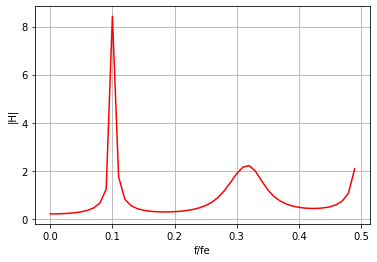

In [6]:
import math
import cmath
f = np.arange(start=0.0,stop=0.5,step=0.01)
plt.plot(f,np.absolute(Hf(f)),'r')
plt.xlabel('f/fe')
plt.ylabel('|H|')
plt.grid()

In [15]:
def Y(z):
  N=len(y[215])
  s=0
  for i in range (N):
    s+=y[215][i]*z**(-i-1)
  return s

def Yf(f):
  return  Y(np.exp(1j*2*math.pi*f))

def e(z):
  return Y(z)/H(z)

def ef(f):
  return e(np.exp(1j*2*math.pi*f/Fe))

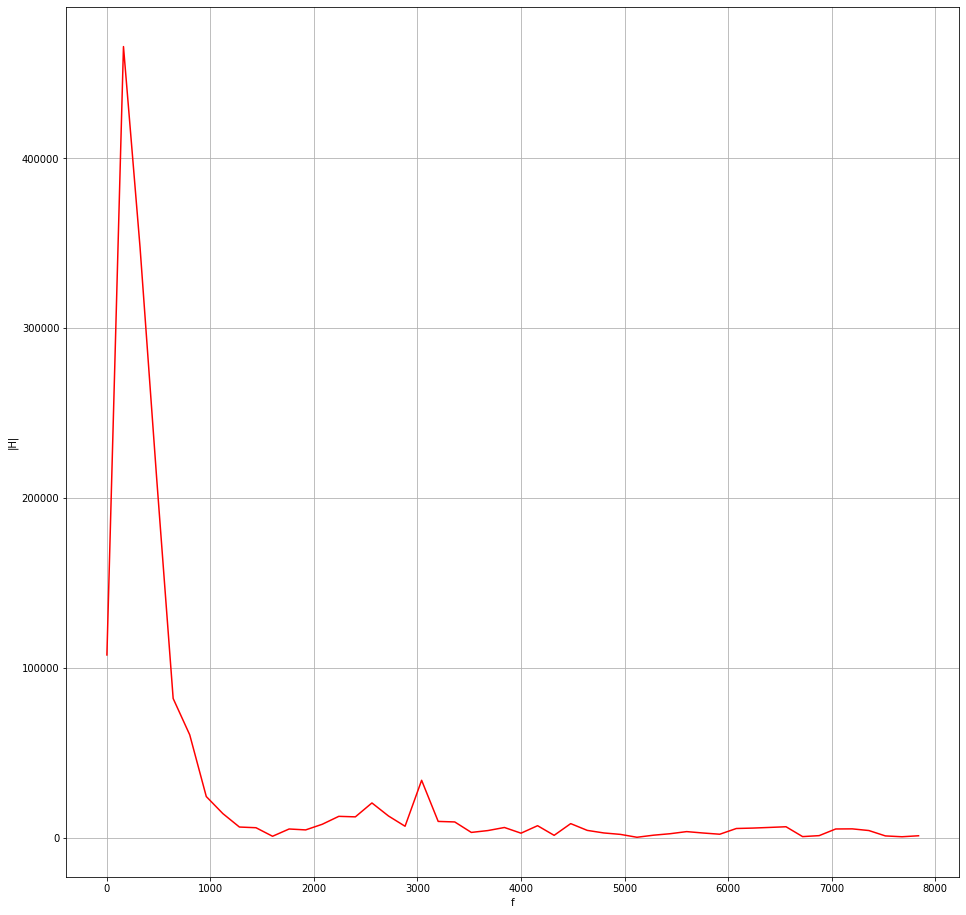

In [18]:
f = np.arange(start=0.0,stop=0.5*Fe,step=0.01*Fe)
plt.figure(figsize=(16,16))
plt.plot(f,np.absolute(ef(f)),'r')
plt.xlabel('f')
plt.ylabel('|H|')
plt.grid()

1


160.0